Generar un conjunto de datos lineales con la ecuación de una recta 𝑥2 = 𝑎𝑥1 + 𝑏, definiendo el rango de trabajo (dominio)
y los valores de los parámetros. Agregar ruido gaussiano con media 0. Calcular los coeficientes de una regresión lineal con
algoritmos genéticos, utilizando alguna librería. ¿Logra estimar correctamente los parámetros de la recta?


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [53]:
usd_gbp = pd.read_csv('C:/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/AlgoritmosGeneticos/data/USDGBP.csv' ,sep =',',parse_dates=[0])
usd_jpy = pd.read_csv('C:/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/AlgoritmosGeneticos/data/USDJPY.csv', sep = ',',parse_dates=[0])
usd_cny = pd.read_csv('C:/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/AlgoritmosGeneticos/data/USDCNY.csv', sep = ',',parse_dates=[0])

Text(0, 0.5, 'USDGBP')

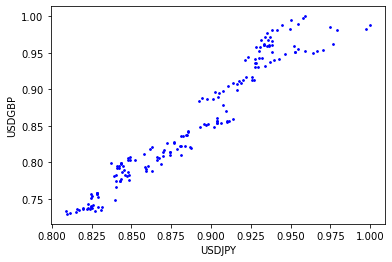

In [54]:
# Merge all datasets to the initial dataset that has most dates
usd_dataset = usd_jpy.merge(right=usd_gbp, how='left', on='Date').merge(right=usd_cny, how='left', on='Date')
# Drop dates where there is one value missing
usd_dataset = usd_dataset.dropna(axis=0, how='any')
# Add a Ticks column to the dataframe
# usd_dataset['Ticks'] = range(len(usd_dataset.index.values), 0, -1)

# Take into consideration only two currencies
curr = 'USDJPY'
curr2 = 'USDGBP'

days = 180
X = preprocessing.normalize(usd_dataset[curr].values.reshape(-1, 1)[-days:], axis=0, norm='max')
y = preprocessing.normalize(usd_dataset[curr2].values.reshape(-1, 1)[-days:], axis=0, norm='max')
plt.scatter(X, y, marker='o', color='blue', s=3)
plt.xlabel(curr)
plt.ylabel(curr2)

In [56]:
# Create Linear Regression model and fit the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Coefficient :', np.round(model.coef_[0][0],decimals=4),
      '\nIntercept :', np.round(model.intercept_[0], decimals=4))

Coefficient : 1.7007 
Intercept : -0.6562


Text(0, 0.5, 'USDGBP')

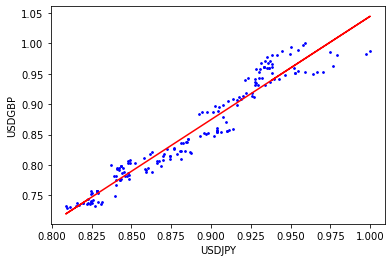

In [64]:
# Predict the data with the found best fit line and plot it
line = model.predict(X)
plt.scatter(X, y, marker='o', color='blue', s=3)
plt.plot(X, line, color='red')
plt.xlabel(curr)
plt.ylabel(curr2)

<ipython-input-75-5ffce6e5fca9>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


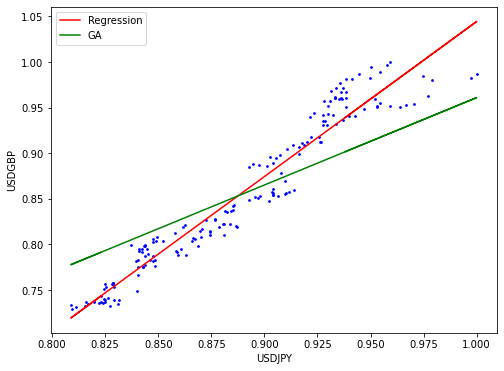

In [75]:
# GA functions
from geneticalgorithm import geneticalgorithm as ga

def fitness(solution):
    '''Fitness function is the Ordinary Least Squares'''
    return 1/len(X)*np.sum(np.power(y-np.concatenate((X,np.ones((X.shape[0],1))),axis=1).dot(solution.reshape(-1,1)),2))

def genPopulation(size=400):
    '''Generate population of size individuals'''
    # Coefficient and intercept in the range [-1, 1] since all data has been normalized with maximum value
    solutions = ((np.random.rand(size, 2) * 2) - 1)
    return solutions

def selectBest(solutions):
    '''Return the best 20 solution for current population'''
    fitnesses = np.apply_along_axis(fitness, 1, solutions)
    return solutions[np.argsort(fitnesses, axis=0)[:20],:]

def crossover(sol1, sol2):
    '''Perform crossover between two solutions by exchanging the intercepts and maintaining the coefficient'''
    offsprings = np.array([[sol1[0], sol2[1]]])
    offsprings = np.vstack((offsprings, [[sol2[0], sol1[1]]]))
    offsprings = np.vstack((offsprings, [sol2]))
    return offsprings

def mutation(sol):
    '''Perform mutation on the solution'''
    mutationProb = 0.15
    if np.random.rand() < mutationProb:
        sol = sol 
    return sol

# Perform epochs while executing the genetic algorithm
size = 400
solutions = genPopulation(size)
epochs = 400
best = []
inter_sol = []
fig = plt.figure(figsize=(8, 6))
#fig.set_tight_layout(True)
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for i in range(epochs):
    bestSols = selectBest(solutions)
    if i != 0 and fitness(bestSols[0]) < fitness(best):
        best = bestSols[0]
    else:
        best = bestSols[0]
    predict = np.concatenate((X, np.ones((X.shape[0],1))), axis=1).dot(best.transpose())
    inter_sol.append(predict)
    ax.clear()
    plt.scatter(X, y, marker='o', color='blue', s=3)
    plt.plot(X, line, color='red', label='Regression')
    plt.plot(X, predict, color='green', label='GA')
    plt.xlabel(curr)
    plt.ylabel(curr2)
    plt.legend(loc='best')
    fig.canvas.draw()
    # Elitism
    newPopulation = np.array(best)
    for j in range(len(bestSols)-1):
        newPopulation = np.vstack((newPopulation, crossover(bestSols[j], bestSols[j+1])))
    newPopulation = np.apply_along_axis(mutation, 1, newPopulation)
    solutions = newPopulation
#print(best)
